# Week 11 Activity


A local school district has a goal to reach a 95% graduation rate by the end of the decade by identifying students who need intervention before they drop out of school. As a software engineer contacted by the school district, your task is to model the factors that predict how likely a student is to pass their high school final exam, by constructing an intervention system that leverages supervised learning techniques. The board of supervisors has asked that you find the most effective model that uses the least amount of computation costs to save on the budget. You will need to analyze the dataset on students' performance and develop a model that will predict a given student will pass, quantifying whether an intervention is necessary.

# Read the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("student-data.csv")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


# defining the dataset

In [3]:
data.shape

(395, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

# preprocessing steps

In [6]:
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [7]:
# There is no null values in the given data set

In [8]:
#checking outliers

In [9]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
passed        object
dtype: object

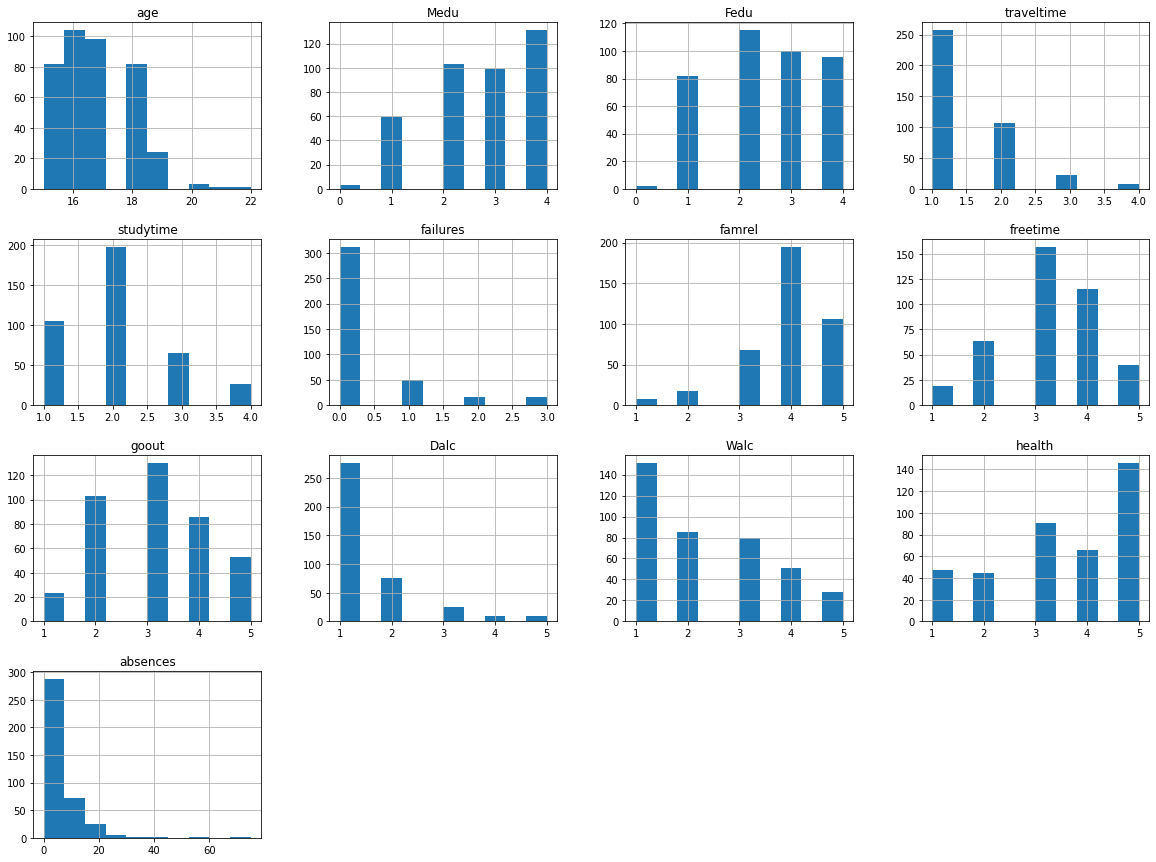

In [10]:
fregraph=data.select_dtypes(include=["int64"])
fregraph.hist(figsize=(20,15))
plt.show()

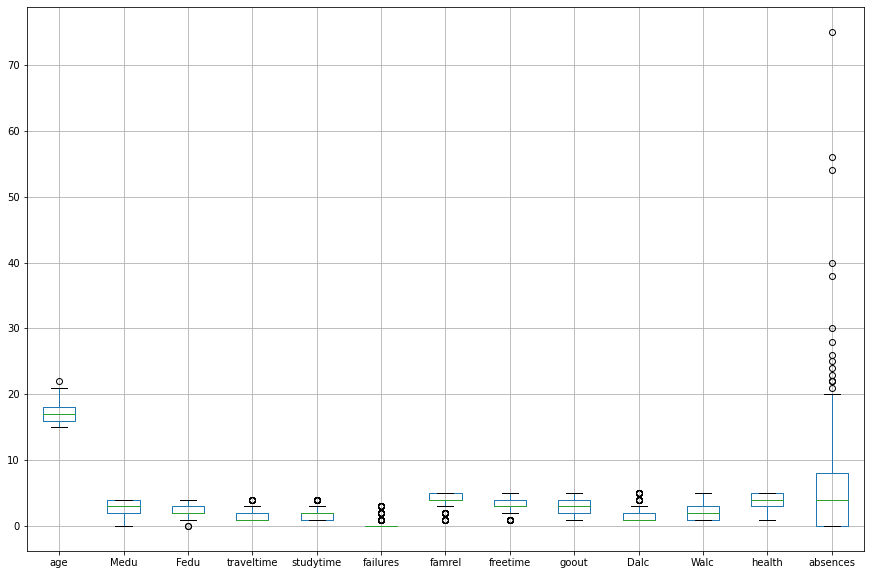

In [11]:
data.boxplot(figsize=(15,10))
plt.show()

In [12]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

Features age,fedu,traveltime,studytime,failures,famrel,freetime,dalc,absences are having outliers

In [13]:
#Handling outliers in age
Q1=np.percentile(data['age'],25, interpolation ='midpoint')
print(Q1)
Q2=np.percentile(data['age'],50, interpolation ='midpoint')
print(Q2)
Q3=np.percentile(data['age'],75, interpolation ='midpoint')
print(Q3)
IQR =Q3-Q1
IQR
low_limit = Q1-1.5*IQR
print(low_limit)
upper_limit =Q3+1.5*IQR
print(upper_limit)

16.0
17.0
18.0
13.0
21.0


In [14]:
outlier = []
for x in data["age"]:
    if ((x>upper_limit) or (x<low_limit)):
        outlier.append(x)
print(outlier)

[22]


In [15]:
ind_1 =data["age"]>upper_limit
data.loc[ind_1].index

Int64Index([247], dtype='int64')

In [16]:
data.drop([247],inplace =True)

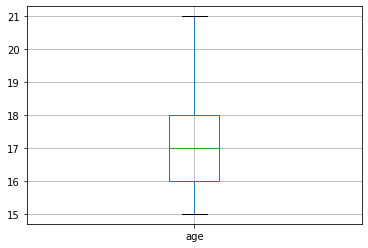

In [17]:
data[["age"]].boxplot()
plt.show()

In [18]:
#Handling outliers in Fedu
Q1=np.percentile(data['Fedu'],25, interpolation ='midpoint')
print(Q1)
Q2=np.percentile(data['Fedu'],50, interpolation ='midpoint')
print(Q2)
Q3=np.percentile(data['Fedu'],75, interpolation ='midpoint')
print(Q3)
IQR =Q3-Q1
IQR
low_limit = Q1-1.5*IQR
print(low_limit)
upper_limit =Q3+1.5*IQR
print(upper_limit)


2.0
2.0
3.0
0.5
4.5


In [19]:
outlier = []
for x in data["Fedu"]:
    if ((x>upper_limit) or (x<low_limit)):
        outlier.append(x)
print(outlier)

[0, 0]


In [20]:
ind_1 =data["Fedu"]<low_limit
data.loc[ind_1].index

Int64Index([76, 171], dtype='int64')

In [21]:
data.drop([76,171],inplace =True)

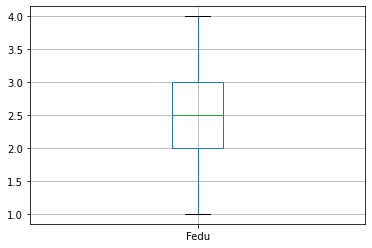

In [22]:
data[['Fedu']].boxplot()
plt.show()

In [23]:
#Handling outliers in traveltime
Q1=np.percentile(data['traveltime'],25, interpolation ='midpoint')
print(Q1)
Q2=np.percentile(data['traveltime'],50, interpolation ='midpoint')
print(Q2)
Q3=np.percentile(data['traveltime'],75, interpolation ='midpoint')
print(Q3)
IQR =Q3-Q1
IQR
low_limit = Q1-1.5*IQR
print(low_limit)
upper_limit =Q3+1.5*IQR
print(upper_limit)


1.0
1.0
2.0
-0.5
3.5


In [24]:
outlier = []
for x in data["traveltime"]:
    if ((x>upper_limit) or (x<low_limit)):
        outlier.append(x)
print(outlier)

[4, 4, 4, 4, 4, 4, 4, 4]


In [25]:
ind_1 =data["traveltime"]>upper_limit
data.loc[ind_1].index

Int64Index([61, 108, 134, 149, 164, 228, 327, 375], dtype='int64')

In [26]:
data.drop([61, 108, 134, 149, 164, 228, 327, 375], inplace=True)

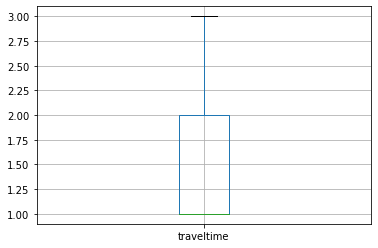

In [27]:
data[['traveltime']].boxplot()
plt.show()

In [28]:
#Handling outliers in studytime
Q1=np.percentile(data['studytime'],25, interpolation ='midpoint')
print(Q1)
Q2=np.percentile(data['studytime'],50, interpolation ='midpoint')
print(Q2)
Q3=np.percentile(data['studytime'],75, interpolation ='midpoint')
print(Q3)
IQR =Q3-Q1
IQR
low_limit = Q1-1.5*IQR
print(low_limit)
upper_limit =Q3+1.5*IQR
print(upper_limit)
outlier = []
for x in data["studytime"]:
    if ((x>upper_limit) or (x<low_limit)):
        outlier.append(x)
print(outlier)


1.0
2.0
2.0
-0.5
3.5
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [29]:
ind_1 =data["studytime"]>upper_limit
data.loc[ind_1].index

Int64Index([ 47,  66,  67,  69,  70,  71,  77,  94,  95, 105, 106, 121, 140,
            204, 210, 256, 259, 271, 282, 293, 298, 303, 330, 334, 338],
           dtype='int64')

In [30]:
data.drop([ 47,  66,  67,  69,  70,  71,  77,  94,  95, 105, 106, 121, 140,
            204, 210, 256, 259, 271, 282, 293, 298, 303, 330, 334, 338], inplace=True)

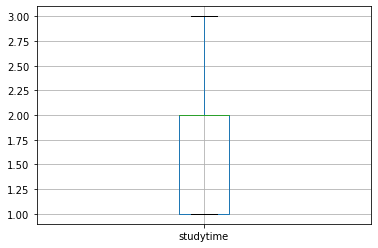

In [31]:
data[['studytime']].boxplot()
plt.show()

In [32]:
#Handling outliers in failures
Q1=np.percentile(data['failures'],25, interpolation ='midpoint')
print(Q1)
Q2=np.percentile(data['failures'],50, interpolation ='midpoint')
print(Q2)
Q3=np.percentile(data['failures'],75, interpolation ='midpoint')
print(Q3)
IQR =Q3-Q1
IQR
low_limit = Q1-1.5*IQR
print(low_limit)
upper_limit =Q3+1.5*IQR
print(upper_limit)
outlier = []
for x in data["failures"]:
    if ((x>upper_limit) or (x<low_limit)):
        outlier.append(x)
print(outlier)
ind_1 =data["failures"]>upper_limit
data.loc[ind_1].index


0.0
0.0
0.0
0.0
0.0
[3, 3, 2, 1, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 3, 2, 2, 2, 1, 2, 3, 3, 3, 1, 2, 3, 3, 1, 2, 2, 1, 1, 2, 3, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 3]


Int64Index([  2,  18,  25,  40,  44,  49,  52,  72,  78,  85,  88, 111, 112,
            118, 127, 128, 130, 137, 138, 141, 144, 146, 150, 151, 152, 153,
            157, 159, 160, 161, 162, 165, 170, 173, 198, 205, 206, 213, 216,
            217, 221, 225, 239, 248, 250, 252, 255, 270, 278, 281, 292, 304,
            305, 307, 308, 309, 310, 312, 313, 314, 315, 336, 340, 341, 343,
            349, 350, 352, 353, 361, 367, 370, 376, 383, 384, 387, 389, 390,
            392],
           dtype='int64')

In [33]:
data.drop([ 2,  18,  25,  40,  44,  49,  52,  72,  78,  85,  88, 111, 112,
            118, 127, 128, 130, 137, 138, 141, 144, 146, 150, 151, 152, 153,
            157, 159, 160, 161, 162, 165, 170, 173, 198, 205, 206, 213, 216,
            217, 221, 225, 239, 248, 250, 252, 255, 270, 278, 281, 292, 304,
            305, 307, 308, 309, 310, 312, 313, 314, 315, 336, 340, 341, 343,
            349, 350, 352, 353, 361, 367, 370, 376, 383, 384, 387, 389, 390,
            392 ], inplace=True)

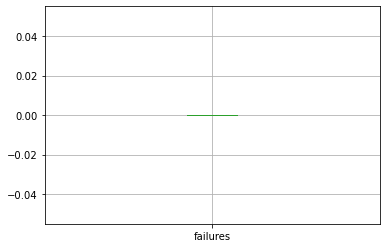

In [34]:
data[['failures']].boxplot()
plt.show()

In [35]:
#Handling outliers in famrel
Q1=np.percentile(data['famrel'],25, interpolation ='midpoint')
print(Q1)
Q2=np.percentile(data['famrel'],50, interpolation ='midpoint')
print(Q2)
Q3=np.percentile(data['famrel'],75, interpolation ='midpoint')
print(Q3)
IQR =Q3-Q1
IQR
low_limit = Q1-1.5*IQR
print(low_limit)
upper_limit =Q3+1.5*IQR
print(upper_limit)


4.0
4.0
5.0
2.5
6.5


In [36]:
ind_1 =data["famrel"]<low_limit
data.loc[ind_1].index

Int64Index([27, 37, 46, 60, 79, 156, 184, 207, 222, 238, 240, 296, 299, 357,
            363, 391],
           dtype='int64')

In [37]:
data.drop([27, 37, 46, 60, 79, 156, 184, 207, 222, 238, 240, 296, 299, 357,
            363, 391] , inplace=True)

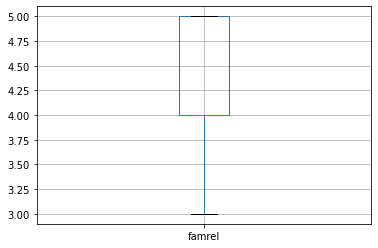

In [38]:
data[["famrel"]].boxplot()
plt.show()

In [39]:
#Handling outliers in freetime
Q1=np.percentile(data['freetime'],25, interpolation ='midpoint')
print(Q1)
Q2=np.percentile(data['freetime'],50, interpolation ='midpoint')
print(Q2)
Q3=np.percentile(data['freetime'],75, interpolation ='midpoint')
print(Q3)
IQR =Q3-Q1
IQR
low_limit = Q1-1.5*IQR
print(low_limit)
upper_limit =Q3+1.5*IQR
print(upper_limit)


3.0
3.0
4.0
1.5
5.5


In [40]:
ind_1 =data["freetime"]<low_limit
data.loc[ind_1].index

Int64Index([7, 19, 68, 89, 168, 189, 260, 276, 301, 378], dtype='int64')

In [41]:
data.drop([7, 19, 68, 89, 168, 189, 260, 276, 301, 378], inplace=True)

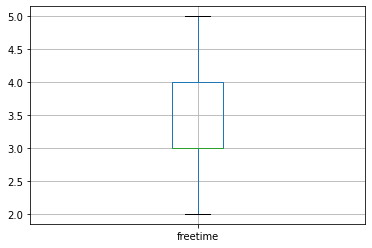

In [42]:
data[["freetime"]].boxplot()
plt.show()

In [43]:
#Handling outliers in Dalc
Q1=np.percentile(data['Dalc'],25, interpolation ='midpoint')
print(Q1)
Q2=np.percentile(data['Dalc'],50, interpolation ='midpoint')
print(Q2)
Q3=np.percentile(data['Dalc'],75, interpolation ='midpoint')

IQR
low_limit = Q1-1.5*IQR
print(low_limit)
upper_limit =Q3+1.5*IQR
print(upper_limit)


1.0
1.0
-0.5
3.5


In [44]:
ind_1 =data["Dalc"]>upper_limit
data.loc[ind_1].index

Int64Index([29, 54, 100, 175, 192, 211, 223, 236, 369], dtype='int64')

In [45]:
data.drop([29, 54, 100, 175, 192, 211, 223, 236, 369], inplace=True)

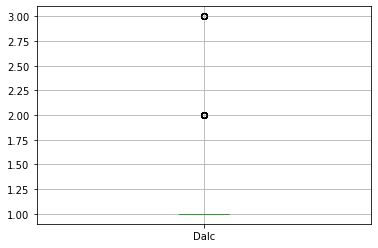

In [46]:
data[["Dalc"]].boxplot()
plt.show()

In [47]:
#Handling outliers in absences
Q1=np.percentile(data['absences'],25, interpolation ='midpoint')
print(Q1)
Q2=np.percentile(data['absences'],50, interpolation ='midpoint')
print(Q2)
Q3=np.percentile(data['absences'],75, interpolation ='midpoint')
print(Q3)
IQR =Q3-Q1
IQR
low_limit = Q1-1.5*IQR
print(low_limit)
upper_limit =Q3+1.5*IQR
print(upper_limit)


0.0
2.0
6.0
-9.0
15.0


In [48]:
ind_1 =data["absences"]>upper_limit
data.loc[ind_1].index

Int64Index([74, 103, 123, 133, 183, 203, 234, 237, 277, 280, 311, 320, 335,
            379],
           dtype='int64')

In [49]:
data.drop([74, 103, 123, 133, 183, 203, 234, 237, 277, 280, 311, 320, 335,
            379], inplace=True)

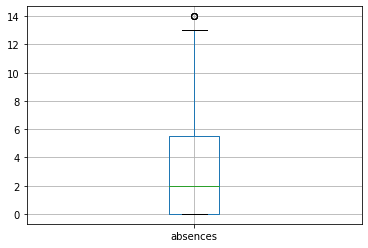

In [50]:
data[["absences"]].boxplot()
plt.show()

In [51]:
data.shape

(231, 31)

After handling outliers our dataset shape changed from (395, 31) to (231, 31)

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["passed"] = le.fit_transform(data["passed"])
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,1
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,no,5,4,2,1,2,5,10,1


In [53]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [54]:
x=data.drop(['school','sex','reason','guardian','nursery','passed'],axis=1)
y=data['passed']

In [55]:
x.columns

Index(['age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences'],
      dtype='object')

In [56]:
x["ttime"]=x["freetime"]+x["goout"]

In [57]:
x = x.drop(data[['freetime','goout']],axis=1)

In [58]:
x["Talc"]=x["Dalc"]+x["Walc"]

In [59]:
x = x.drop(data[["Dalc","Walc"]],axis=1)

In [60]:
x.columns

Index(['age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'higher', 'internet', 'romantic', 'famrel', 'health',
       'absences', 'ttime', 'Talc'],
      dtype='object')

In [61]:
x.head()

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,traveltime,studytime,...,paid,activities,higher,internet,romantic,famrel,health,absences,ttime,Talc
0,18,U,GT3,A,4,4,at_home,teacher,2,2,...,no,no,yes,no,no,4,3,6,7,2
1,17,U,GT3,T,1,1,at_home,other,1,2,...,no,no,yes,yes,no,5,3,4,6,2
3,15,U,GT3,T,4,2,health,services,1,3,...,yes,yes,yes,yes,yes,3,5,2,4,2
4,16,U,GT3,T,3,3,other,other,1,2,...,yes,no,yes,no,no,4,5,4,5,3
5,16,U,LE3,T,4,3,services,other,1,2,...,yes,yes,yes,yes,no,5,5,10,6,3


In [62]:
data["address"].value_counts()

U    187
R     44
Name: address, dtype: int64

In [63]:
data["famsize"].value_counts()

GT3    168
LE3     63
Name: famsize, dtype: int64

In [64]:
# one hot encoding  to address and famsize
address_ec =pd.get_dummies(x["address"])
famsize_ec =pd.get_dummies(x["famsize"])
x=pd.concat([x,address_ec,famsize_ec],axis=1)

In [65]:
x.head()

,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,traveltime,studytime,...,romantic,famrel,health,absences,ttime,Talc,R,U,GT3,LE3
0,18,U,GT3,A,4,4,at_home,teacher,2,2,...,no,4,3,6,7,2,0,1,1,0
1,17,U,GT3,T,1,1,at_home,other,1,2,...,no,5,3,4,6,2,0,1,1,0
3,15,U,GT3,T,4,2,health,services,1,3,...,yes,3,5,2,4,2,0,1,1,0
4,16,U,GT3,T,3,3,other,other,1,2,...,no,4,5,4,5,3,0,1,1,0
5,16,U,LE3,T,4,3,services,other,1,2,...,no,5,5,10,6,3,0,1,0,1


In [66]:
x = x.drop(["address","famsize"],axis=1)
x.head()

,age,Pstatus,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,schoolsup,...,romantic,famrel,health,absences,ttime,Talc,R,U,GT3,LE3
0,18,A,4,4,at_home,teacher,2,2,0,yes,...,no,4,3,6,7,2,0,1,1,0
1,17,T,1,1,at_home,other,1,2,0,no,...,no,5,3,4,6,2,0,1,1,0
3,15,T,4,2,health,services,1,3,0,no,...,yes,3,5,2,4,2,0,1,1,0
4,16,T,3,3,other,other,1,2,0,no,...,no,4,5,4,5,3,0,1,1,0
5,16,T,4,3,services,other,1,2,0,no,...,no,5,5,10,6,3,0,1,0,1


In [67]:
data["Mjob"].value_counts()

other       79
services    53
teacher     46
at_home     33
health      20
Name: Mjob, dtype: int64

In [68]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x["Mjob"] = le.fit_transform(x["Mjob"])
x.head()

,age,Pstatus,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,schoolsup,...,romantic,famrel,health,absences,ttime,Talc,R,U,GT3,LE3
0,18,A,4,4,0,teacher,2,2,0,yes,...,no,4,3,6,7,2,0,1,1,0
1,17,T,1,1,0,other,1,2,0,no,...,no,5,3,4,6,2,0,1,1,0
3,15,T,4,2,1,services,1,3,0,no,...,yes,3,5,2,4,2,0,1,1,0
4,16,T,3,3,2,other,1,2,0,no,...,no,4,5,4,5,3,0,1,1,0
5,16,T,4,3,3,other,1,2,0,no,...,no,5,5,10,6,3,0,1,0,1


In [69]:
data["Fjob"].value_counts()

other       130
services     61
teacher      17
at_home      13
health       10
Name: Fjob, dtype: int64

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x["Fjob"] = le.fit_transform(x["Fjob"])
x.head()

,age,Pstatus,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,schoolsup,...,romantic,famrel,health,absences,ttime,Talc,R,U,GT3,LE3
0,18,A,4,4,0,4,2,2,0,yes,...,no,4,3,6,7,2,0,1,1,0
1,17,T,1,1,0,2,1,2,0,no,...,no,5,3,4,6,2,0,1,1,0
3,15,T,4,2,1,3,1,3,0,no,...,yes,3,5,2,4,2,0,1,1,0
4,16,T,3,3,2,2,1,2,0,no,...,no,4,5,4,5,3,0,1,1,0
5,16,T,4,3,3,2,1,2,0,no,...,no,5,5,10,6,3,0,1,0,1


In [71]:
data["Pstatus"].value_counts()

T    210
A     21
Name: Pstatus, dtype: int64

In [72]:
data["schoolsup"].value_counts()

no     203
yes     28
Name: schoolsup, dtype: int64

In [73]:
# one hot encoding  to Pstatus and schoolsup
p_ec =pd.get_dummies(x["Pstatus"])
s_ec =pd.get_dummies(x["schoolsup"])
x=pd.concat([x,p_ec,s_ec],axis=1)
x.head()

,age,Pstatus,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,schoolsup,...,ttime,Talc,R,U,GT3,LE3,A,T,no,yes
0,18,A,4,4,0,4,2,2,0,yes,...,7,2,0,1,1,0,1,0,0,1
1,17,T,1,1,0,2,1,2,0,no,...,6,2,0,1,1,0,0,1,1,0
3,15,T,4,2,1,3,1,3,0,no,...,4,2,0,1,1,0,0,1,1,0
4,16,T,3,3,2,2,1,2,0,no,...,5,3,0,1,1,0,0,1,1,0
5,16,T,4,3,3,2,1,2,0,no,...,6,3,0,1,0,1,0,1,1,0


In [74]:
x = x.drop(["Pstatus","schoolsup"],axis=1)
x.head()

,age,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,famsup,paid,...,ttime,Talc,R,U,GT3,LE3,A,T,no,yes
0,18,4,4,0,4,2,2,0,no,no,...,7,2,0,1,1,0,1,0,0,1
1,17,1,1,0,2,1,2,0,yes,no,...,6,2,0,1,1,0,0,1,1,0
3,15,4,2,1,3,1,3,0,yes,yes,...,4,2,0,1,1,0,0,1,1,0
4,16,3,3,2,2,1,2,0,yes,yes,...,5,3,0,1,1,0,0,1,1,0
5,16,4,3,3,2,1,2,0,yes,yes,...,6,3,0,1,0,1,0,1,1,0


In [75]:
data["famsup"].value_counts()

yes    146
no      85
Name: famsup, dtype: int64

In [76]:
data["paid"].value_counts()

no     117
yes    114
Name: paid, dtype: int64

In [77]:
# one hot encoding  to famsup and paid
fam_ec =pd.get_dummies(x["famsup"])
p_ec =pd.get_dummies(x["paid"])
x=pd.concat([x,fam_ec,p_ec],axis=1)
x.head()

,age,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,famsup,paid,...,GT3,LE3,A,T,no,yes,no,yes,no,yes
0,18,4,4,0,4,2,2,0,no,no,...,1,0,1,0,0,1,1,0,1,0
1,17,1,1,0,2,1,2,0,yes,no,...,1,0,0,1,1,0,0,1,1,0
3,15,4,2,1,3,1,3,0,yes,yes,...,1,0,0,1,1,0,0,1,0,1
4,16,3,3,2,2,1,2,0,yes,yes,...,1,0,0,1,1,0,0,1,0,1
5,16,4,3,3,2,1,2,0,yes,yes,...,0,1,0,1,1,0,0,1,0,1


In [78]:
x = x.drop(["famsup","paid"],axis=1)
x.head()

,age,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,activities,higher,...,GT3,LE3,A,T,no,yes,no,yes,no,yes
0,18,4,4,0,4,2,2,0,no,yes,...,1,0,1,0,0,1,1,0,1,0
1,17,1,1,0,2,1,2,0,no,yes,...,1,0,0,1,1,0,0,1,1,0
3,15,4,2,1,3,1,3,0,yes,yes,...,1,0,0,1,1,0,0,1,0,1
4,16,3,3,2,2,1,2,0,no,yes,...,1,0,0,1,1,0,0,1,0,1
5,16,4,3,3,2,1,2,0,yes,yes,...,0,1,0,1,1,0,0,1,0,1


In [79]:
data["activities"].value_counts()

yes    125
no     106
Name: activities, dtype: int64

In [80]:
data["higher"].value_counts()

yes    226
no       5
Name: higher, dtype: int64

In [81]:
# one hot encoding  to activites and higher
ac_ec =pd.get_dummies(x["activities"])
h_ec =pd.get_dummies(x["higher"])
x=pd.concat([x,ac_ec,h_ec],axis=1)
x.head()

,age,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,activities,higher,...,no,yes,no,yes,no,yes,no,yes,no,yes
0,18,4,4,0,4,2,2,0,no,yes,...,0,1,1,0,1,0,1,0,0,1
1,17,1,1,0,2,1,2,0,no,yes,...,1,0,0,1,1,0,1,0,0,1
3,15,4,2,1,3,1,3,0,yes,yes,...,1,0,0,1,0,1,0,1,0,1
4,16,3,3,2,2,1,2,0,no,yes,...,1,0,0,1,0,1,1,0,0,1
5,16,4,3,3,2,1,2,0,yes,yes,...,1,0,0,1,0,1,0,1,0,1


In [82]:
x = x.drop(["activities","higher"],axis=1)
x.head()

,age,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,internet,romantic,...,no,yes,no,yes,no,yes,no,yes,no,yes
0,18,4,4,0,4,2,2,0,no,no,...,0,1,1,0,1,0,1,0,0,1
1,17,1,1,0,2,1,2,0,yes,no,...,1,0,0,1,1,0,1,0,0,1
3,15,4,2,1,3,1,3,0,yes,yes,...,1,0,0,1,0,1,0,1,0,1
4,16,3,3,2,2,1,2,0,no,no,...,1,0,0,1,0,1,1,0,0,1
5,16,4,3,3,2,1,2,0,yes,no,...,1,0,0,1,0,1,0,1,0,1


In [83]:
data["internet"].value_counts()

yes    196
no      35
Name: internet, dtype: int64

In [84]:
data["romantic"].value_counts()

no     162
yes     69
Name: romantic, dtype: int64

In [85]:
# one hot encoding  to internet and romantic
i_ec =pd.get_dummies(x["internet"])
r_ec =pd.get_dummies(x["romantic"])
x=pd.concat([x,i_ec,r_ec],axis=1)
x.head()

,age,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,internet,romantic,...,no,yes,no,yes,no,yes,no,yes,no,yes
0,18,4,4,0,4,2,2,0,no,no,...,1,0,1,0,0,1,1,0,1,0
1,17,1,1,0,2,1,2,0,yes,no,...,1,0,1,0,0,1,0,1,1,0
3,15,4,2,1,3,1,3,0,yes,yes,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,2,2,1,2,0,no,no,...,0,1,1,0,0,1,1,0,1,0
5,16,4,3,3,2,1,2,0,yes,no,...,0,1,0,1,0,1,0,1,1,0


In [86]:
x = x.drop(["internet","romantic"],axis=1)
x.head()

,age,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,famrel,health,...,no,yes,no,yes,no,yes,no,yes,no,yes
0,18,4,4,0,4,2,2,0,4,3,...,1,0,1,0,0,1,1,0,1,0
1,17,1,1,0,2,1,2,0,5,3,...,1,0,1,0,0,1,0,1,1,0
3,15,4,2,1,3,1,3,0,3,5,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,2,2,1,2,0,4,5,...,0,1,1,0,0,1,1,0,1,0
5,16,4,3,3,2,1,2,0,5,5,...,0,1,0,1,0,1,0,1,1,0


In [87]:
x.columns

Index(['age', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'traveltime', 'studytime',
       'failures', 'famrel', 'health', 'absences', 'ttime', 'Talc', 'R', 'U',
       'GT3', 'LE3', 'A', 'T', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no',
       'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes'],
      dtype='object')

In [88]:
x.shape

(231, 33)

# splitting the dataset

In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=2)


In [90]:
x_train.shape

(161, 33)

In [91]:
y_train.shape

(161,)

In [92]:
y_test.shape

(70,)

In [93]:
x_test.shape

(70, 33)

# Build the model

# Model 1:RandomForestClassifier

In [94]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

In [95]:
import warnings
warnings.filterwarnings("ignore")

In [96]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score,recall_score
print("Accuracy on RandomForestClassifier model is: ",accuracy_score(y_test,y_pred))
print("Precision on RandomForestClassifier Modelis :",precision_score(y_test,y_pred,pos_label='positive',average='micro'))
print("Recall on RandomForestClassifier Modelis :",recall_score(y_test,y_pred,pos_label='positive',average='micro'))
print("f1_score on RandomForestClassifier model is: ",f1_score(y_test,y_pred))
print("Confusion matrix on RandomForestClassifier model is: ",confusion_matrix(y_test,y_pred))

Accuracy on RandomForestClassifier model is:  0.7857142857142857
Precision on RandomForestClassifier Modelis : 0.7857142857142857
Recall on RandomForestClassifier Modelis : 0.7857142857142857
f1_score on RandomForestClassifier model is:  0.8799999999999999
Confusion matrix on RandomForestClassifier model is:  [[ 0 14]
 [ 1 55]]


# Model2 : logistic regression

In [97]:
from sklearn.linear_model import LogisticRegression
logit_model =LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred1 =logit_model.predict(x_test)

In [98]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy on Logistic Regression Model is :",accuracy_score(y_test,y_pred1))
print("Precision on Logistic Regression Modelis :",precision_score(y_test,y_pred1,pos_label='positive',average='micro'))
print("Recall on Logistic Regression Modelis :",recall_score(y_test,y_pred1,pos_label='positive',average='micro'))
print("f1 on Logistic Regression Modelscoreis :",f1_score(y_test,y_pred1,pos_label='positive',average='micro'))
print("confusion matrix on Logistic Regression Model",confusion_matrix(y_test,y_pred1))


Accuracy on Logistic Regression Model is : 0.7857142857142857
Precision on Logistic Regression Modelis : 0.7857142857142857
Recall on Logistic Regression Modelis : 0.7857142857142857
f1 on Logistic Regression Modelscoreis : 0.7857142857142857
confusion matrix on Logistic Regression Model [[ 2 12]
 [ 3 53]]


# Model 3 :KNN

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
acc_values = []
neighbors =np.arange(3,15)
for k in neighbors:
    classifier =KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred =classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [101]:
acc_values

[0.8142857142857143,
 0.7285714285714285,
 0.8,
 0.8285714285714286,
 0.7857142857142857,
 0.7714285714285715,
 0.7714285714285715,
 0.7857142857142857,
 0.7857142857142857,
 0.8,
 0.8142857142857143,
 0.8142857142857143]

In [102]:
confusion_matrix(y_test,y_pred)

array([[ 1, 13],
       [ 0, 56]], dtype=int64)

Text(0, 0.5, 'accuracy')

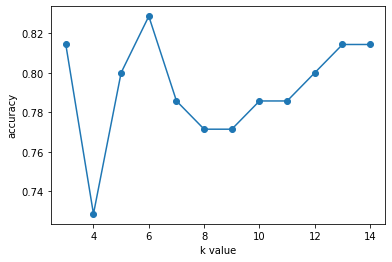

In [103]:
#checking which k value is having more accuracy value 
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [104]:
#assign k=6
classifier =KNeighborsClassifier(n_neighbors=6,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred =classifier.predict(x_test)

In [105]:
print("Accuracy on KNN Model is :",accuracy_score(y_test,y_pred))
print("Precision on KNN Model is :",precision_score(y_test,y_pred))
print("Recall on  KNN Model is :",recall_score(y_test,y_pred))
print("f1 score on  KNN Model is :",f1_score(y_test,y_pred))
print("confusion matrix  on KNN Model is:",confusion_matrix(y_test,y_pred))

Accuracy on KNN Model is : 0.8285714285714286
Precision on KNN Model is : 0.8793103448275862
Recall on  KNN Model is : 0.9107142857142857
f1 score on  KNN Model is : 0.8947368421052632
confusion matrix  on KNN Model is: [[ 7  7]
 [ 5 51]]


# Model 4:support vector machine algorithm

# Linear svm

In [106]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred3 =svm_linear.predict(x_test)
print("Accuracy on  Linear svm Model is: ",accuracy_score(y_test,y_pred3))
print("Precision on Linear svm  Modelis :",precision_score(y_test,y_pred3,pos_label='positive',average='micro'))
print("Recall on Linear svm Modelis :",recall_score(y_test,y_pred3,pos_label='positive',average='micro'))
print("f1 on Linear svm  Modelscoreis :",f1_score(y_test,y_pred3,pos_label='positive',average='micro'))
print("confusion matrix on Linear svm Model is: ",confusion_matrix(y_test,y_pred3))

Accuracy on  Linear svm Model is:  0.8
Precision on Linear svm  Modelis : 0.8
Recall on Linear svm Modelis : 0.8
f1 on Linear svm  Modelscoreis : 0.8000000000000002
confusion matrix on Linear svm Model is:  [[ 0 14]
 [ 0 56]]


# Polynomial SVM Model

In [107]:
from sklearn.svm import SVC
svm_poly = SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_pred3 =svm_poly.predict(x_test)
print("Accuracy on svc Polynomial model is: ",accuracy_score(y_test,y_pred))
print("Precision on Logistic Regression Modelis :",precision_score(y_test,y_pred3,pos_label='positive',average='micro'))
print("Recall on Logistic Regression Modelis :",recall_score(y_test,y_pred3,pos_label='positive',average='micro'))
print("f1 on Logistic Regression Modelscoreis :",f1_score(y_test,y_pred3,pos_label='positive',average='micro'))
print("confusion matrix on svc polynomial model is : ",confusion_matrix(y_test,y_pred3))

Accuracy on svc Polynomial model is:  0.8285714285714286
Precision on Logistic Regression Modelis : 0.8
Recall on Logistic Regression Modelis : 0.8
f1 on Logistic Regression Modelscoreis : 0.8000000000000002
confusion matrix on svc polynomial model is :  [[ 0 14]
 [ 0 56]]


# Radial SVM Model

In [108]:
from sklearn.svm import SVC
svm_radial = SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_pred3 =svm_radial.predict(x_test)
print("Accuracy on Radial SVM Model is: ",accuracy_score(y_test,y_pred3))
print("Precision on Radial SVM Modelis :",precision_score(y_test,y_pred3,pos_label='positive',average='micro'))
print("Recall on Radial SVM  Modelis :",recall_score(y_test,y_pred3,pos_label='positive',average='micro'))
print("f1 on Radial SVM  Modelscoreis :",f1_score(y_test,y_pred3,pos_label='positive',average='micro'))
print("confusion matrix on Radial SVM Model is : ",confusion_matrix(y_test,y_pred3))

Accuracy on Radial SVM Model is:  0.8
Precision on Radial SVM Modelis : 0.8
Recall on Radial SVM  Modelis : 0.8
f1 on Radial SVM  Modelscoreis : 0.8000000000000002
confusion matrix on Radial SVM Model is :  [[ 0 14]
 [ 0 56]]


# Model 5: Decision Tree classifier

In [109]:
 from sklearn.tree import DecisionTreeClassifier
dt_model =  DecisionTreeClassifier()
dt_model.fit(x_train,y_train)


DecisionTreeClassifier()

In [110]:
y_pred4 =dt_model.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy on Decision tree model is: ",accuracy_score(y_test,y_pred4))
print("Precision on Decision tree Modelis :",precision_score(y_test,y_pred4,pos_label='positive',average='micro'))
print("Recall on Decision tree Modelis :",recall_score(y_test,y_pred4,pos_label='positive',average='micro'))
print("f1 on Decision treeModelscoreis :",f1_score(y_test,y_pred4,pos_label='positive',average='micro'))
print("confusion matrix on Decision tree model",confusion_matrix(y_test,y_pred4))

Accuracy on Decision tree model is:  0.6285714285714286
Precision on Decision tree Modelis : 0.6285714285714286
Recall on Decision tree Modelis : 0.6285714285714286
f1 on Decision treeModelscoreis : 0.6285714285714286
confusion matrix on Decision tree model [[ 3 11]
 [15 41]]


# Model 6 : GradientBoostingClassifier

In [111]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
y_pred6 = gbc.predict(x_test)

In [112]:
from sklearn.metrics import  accuracy_score,f1_score,confusion_matrix
print("Accuracy on GradientBoostingClassifier model is: ",accuracy_score(y_test,y_pred6))
print("Precision on GradientBoostingClassifier Modelis :",precision_score(y_test,y_pred6,pos_label='positive',average='micro'))
print("Recall on GradientBoostingClassifier Modelis :",recall_score(y_test,y_pred6,pos_label='positive',average='micro'))     
print("f1_score on GradientBoostingClassifier model is: ",f1_score(y_test,y_pred6,average='micro'))
print("Confusion matrix GradientBoostingClassifier mode1 is: ",confusion_matrix(y_test,y_pred6))

Accuracy on GradientBoostingClassifier model is:  0.8
Precision on GradientBoostingClassifier Modelis : 0.8
Recall on GradientBoostingClassifier Modelis : 0.8
f1_score on GradientBoostingClassifier model is:  0.8000000000000002
Confusion matrix GradientBoostingClassifier mode1 is:  [[ 2 12]
 [ 2 54]]


From these models we can select KNN  model because accuracy score is greater and in confusion matrix there is less mismatching  values